In [104]:
import pandas as pd
import os
from plotnine import *
from scipy import stats
import math
from operator import neg

* Check phenotypes and marker alleles at 3H locus

In [2]:
QTL_input = "/cluster/db/mecoulter/misc/JH07_merged_HID144-Barke_Silva138_ASV_enriched_Mapping_0621.csv"

In [5]:
table = pd.read_csv(QTL_input,engine="c")

In [6]:
table.head()

,env.OPS_18,Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium,Pedobacter1,Paenibacillus1,Niastella,Paenibacillus2,Stenotrophomonas,Paenibacillus3,Lysobacter1,Asticcacaulis,...,SCRI_RS_193505,BOPA1_1493_839,SCRI_RS_123211,SCRI_RS_167617,SCRI_RS_168479,SCRI_RS_169268,SCRI_RS_214451,BOPA1_1847_1745,BOPA2_12_30826,BOPA1_2457_2346
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7H,7H,7H,7H,7H,7H,7H,7H,7H,7H
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140.6,140.7,140.7,140.7,140.7,140.7,140.7,140.9,140.9,141.1
2,0.5,2.0,127.5,95.5,22.0,52.0,3.5,13.5,30.5,0.5,...,A,-,A,-,A,A,-,A,-,-
3,8.5,0.5,75.0,104.5,35.0,62.0,4.0,18.0,41.5,0.5,...,A,-,A,-,A,A,-,A,-,-
4,0.5,1.0,20.5,83.5,39.5,39.5,0.0,18.5,72.0,0.0,...,A,-,A,-,A,A,-,A,-,-


* Example marker at 3H locus is BOPA2_12_10114. Use this for now.

In [13]:
locus = table["BOPA2_12_10114"]


* Go through bacteria and plot distribution of abundance according to marker allele

In [83]:
plots = {}
for i in range(0,36):#Produce a plot for each bacterial 'phenotype'
    column = columns[i]
    vav = table[column]
    d = pd.DataFrame({column: pd.Series(vav),"BOPA2_12_10114": pd.Series(locus),})
    df = d[d["BOPA2_12_10114"] != "-"]
    df = df.dropna()
    plot = ggplot(df, aes(x="BOPA2_12_10114", y=column, color="BOPA2_12_10114")) + geom_point() + theme_bw() + geom_jitter()
    plots[column] = plot

In [84]:
plots.keys()

dict_keys(['env.OPS_18', 'Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium', 'Pedobacter1', 'Paenibacillus1', 'Niastella', 'Paenibacillus2', 'Stenotrophomonas', 'Paenibacillus3', 'Lysobacter1', 'Asticcacaulis', 'Variovorax', 'Paenibacillus4', 'Bdellovibrio', 'Duganella', 'Holophaga', 'Vicinamibacterales', 'Lysobacter2', 'Sorangium', 'Sphingopyxis', 'Chryseolinea', 'Tahibacter', 'Pedobacter2', 'Comamonadaceae', 'Chryseobacterium', 'Pedobacter3', 'Asticcacaulis.1', 'Pseudomonas', 'Pseudomonas.1', 'Streptomyces1', 'Lysobacter', 'Sphingomonas', 'Nocardia', 'Streptomyces2', 'Sphingobacteriaceae', 'Streptomyces3', 'Streptomyces4'])

* Now look at plots for bacteria which have the 3H QTL

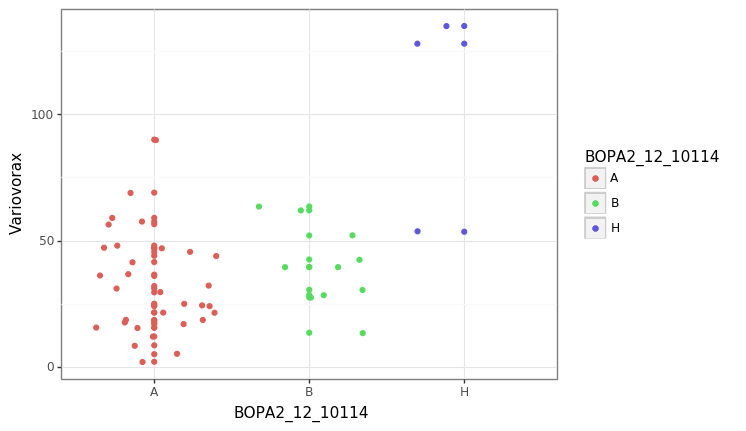

<ggplot: (2935988105135)>

In [74]:
plots['Variovorax']

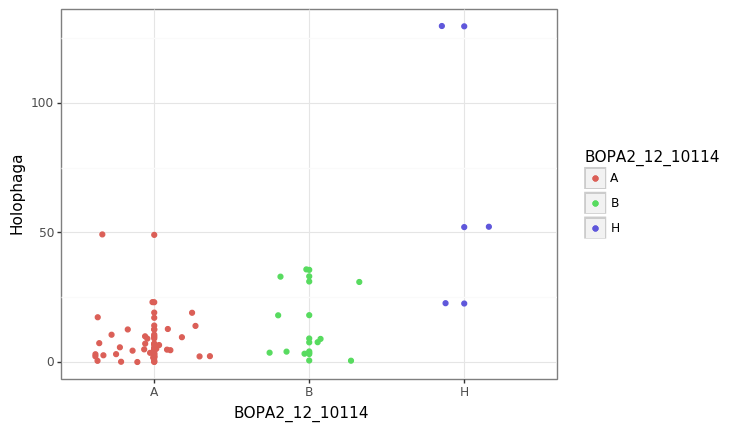

<ggplot: (2935988087086)>

In [77]:
plots['Holophaga']

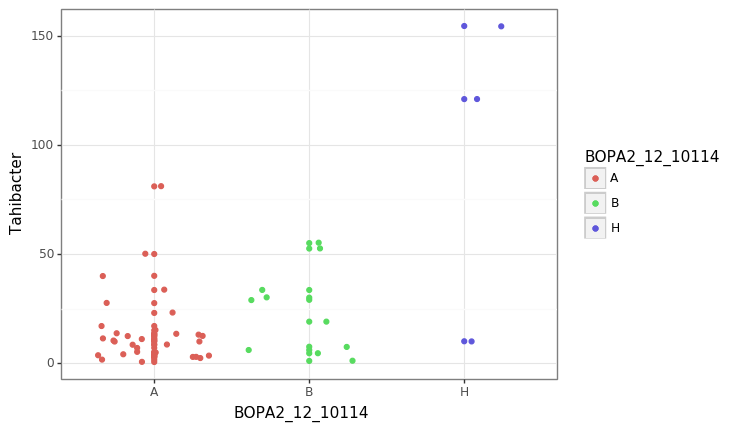

<ggplot: (2935988320497)>

In [87]:
plots['Tahibacter']

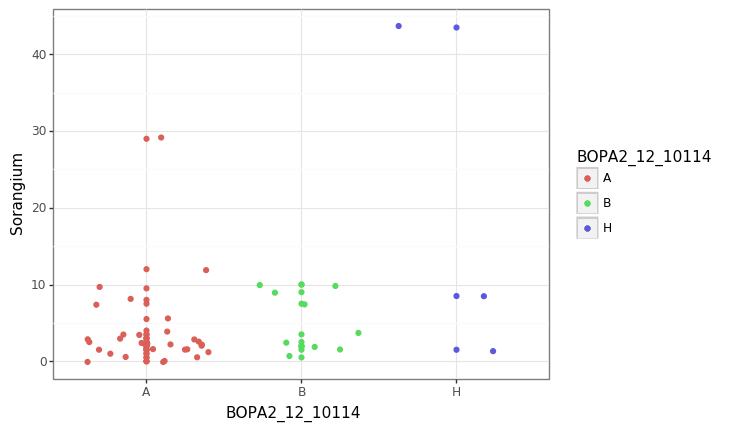

<ggplot: (2935988308676)>

In [88]:
plots["Sorangium"]

* Now to check some of those bacteria ASVs without 3H locus QTL just to check

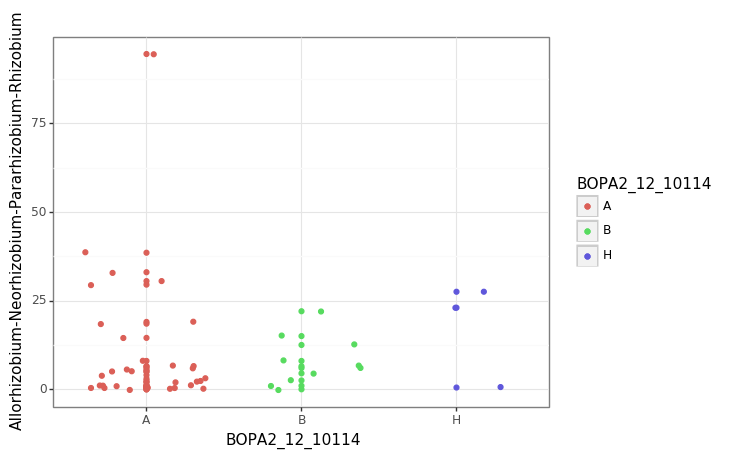

<ggplot: (2935988258458)>

In [89]:
plots['Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium']

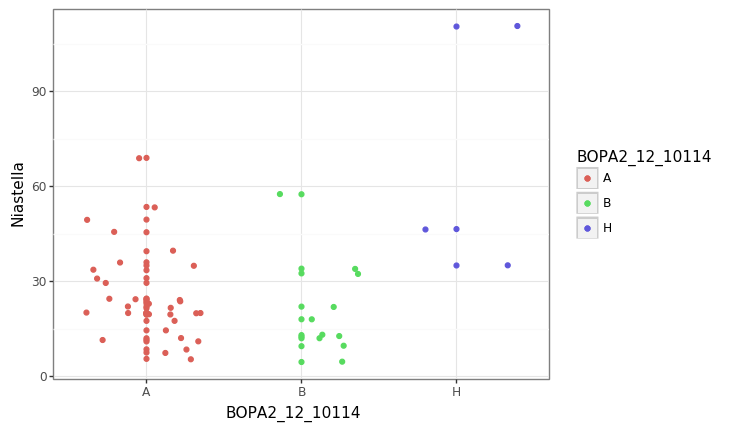

<ggplot: (2935988270755)>

In [90]:
plots['Niastella']

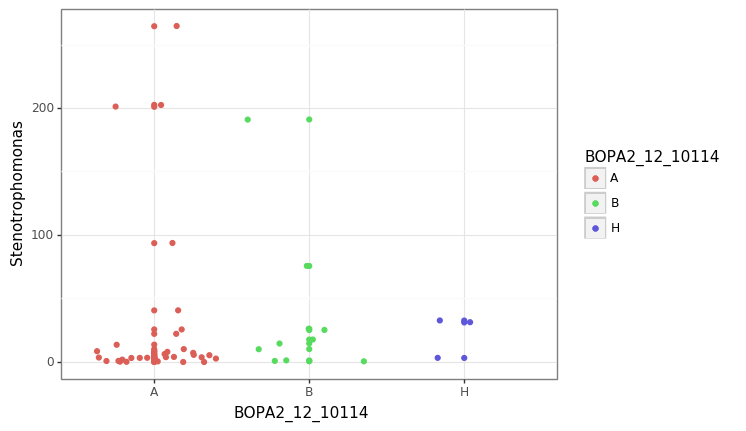

<ggplot: (2935988279182)>

In [91]:
plots['Stenotrophomonas']

Thoughts: 

* These results look pretty similar to the ones Carmen was getting as expected (though I think there are more hets calls... Perhaps this marker calls hets better?)

* My gut is this is heterosis as Carmen said

* Slightly annoyed to be honest that Rajiv did not pick this up... though do the QTL results show what allele is causing the increase in ASVs? They should

* I think we would need to do an experiment to follow this up. Though see what Davide/ Carmen's thoughts are

In [112]:
vav = table["Variovorax"]
d = pd.DataFrame({"Variovorax": pd.Series(vav),"BOPA2_12_10114": pd.Series(locus),})
df = d[d["BOPA2_12_10114"] != "-"]
df = df.dropna()

In [95]:
df[["Variovorax", "BOPA2_12_10114"]].groupby("BOPA2_12_10114").mean()

,Variovorax
BOPA2_12_10114,
A,32.790323
B,39.900000
H,105.500000


In [113]:
A = df[df["BOPA2_12_10114"] == "A"]
B = df[df["BOPA2_12_10114"] == "B"]
H = df[df["BOPA2_12_10114"] == "H"]

In [114]:
stats.ttest_ind(A["Variovorax"], B["Variovorax"])

Ttest_indResult(statistic=-1.0159050785744022, pvalue=0.31593586991115163)

In [116]:
stats.ttest_ind(A["Variovorax"], H["Variovorax"])


Ttest_indResult(statistic=-5.335526043857657, pvalue=7.484825076978681e-06)

In [117]:
stats.ttest_ind(B["Variovorax"], H["Variovorax"])

Ttest_indResult(statistic=-4.148174253945551, pvalue=0.001621453695176347)

-log10(p) ?

In [105]:
neg(math.log(7.484825076978681e-06,10))

5.125818344818672

* Try with one less likely to be significant

In [109]:
ASV = "Holophaga"
vav = table[ASV]
d = pd.DataFrame({"Holophaga": pd.Series(vav),"BOPA2_12_10114": pd.Series(locus),})
df = d[d["BOPA2_12_10114"] != "-"]
df = df.dropna()
A = df[df["BOPA2_12_10114"] == "A"]
B = df[df["BOPA2_12_10114"] == "B"]
H = df[df["BOPA2_12_10114"] == "H"]
print(f"Stats between A and B alleles for {ASV}: {stats.ttest_ind(A[ASV], B[ASV])}")
print(f"Stats between A and H alleles for {ASV}: {stats.ttest_ind(A[ASV], H[ASV])}")
print(f"Stats between B and H alleles for {ASV}: {stats.ttest_ind(B[ASV], H[ASV])}")

Stats between A and B alleles for Holophaga: Ttest_indResult(statistic=-1.6195341021058234, pvalue=0.11339189155324243)
Stats between A and H alleles for Holophaga: Ttest_indResult(statistic=-5.958136363606753, pvalue=1.2252963375742884e-06)
Stats between B and H alleles for Holophaga: Ttest_indResult(statistic=-3.049120477418252, pvalue=0.011064867407886285)


In [110]:
neg(math.log(1.2252963375742884e-06,10))
neg(math.log(0.011064867407886285,10))

1.9560537859272653